In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
BreastData = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(BreastData.data, BreastData.target, test_size=0.3, random_state=0)

In [3]:
RFmodel = RandomForestClassifier()

In [4]:
RFmodel.fit(X_train, y_train)

RandomForestClassifier()

In [5]:
train_score = RFmodel.score(X_train, y_train)
test_score = RFmodel.score(X_test, y_test)
print("Training Accuracy:", train_score)
print("Testing Accuracy:", test_score)

Training Accuracy: 1.0
Testing Accuracy: 0.9707602339181286


In [6]:
y_pred = RFmodel.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 62   1]
 [  4 104]]


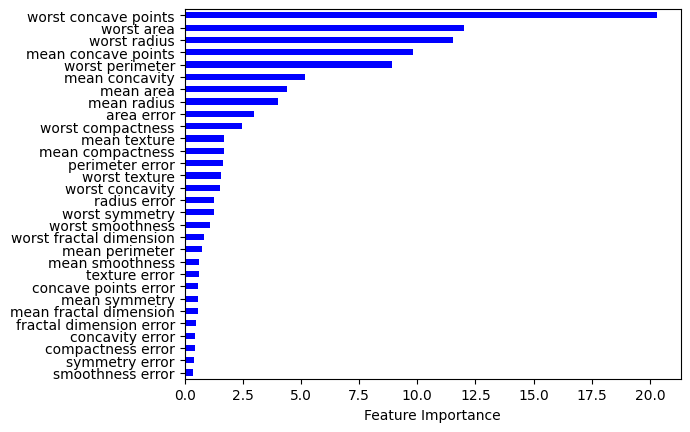

In [7]:
importance = pd.DataFrame({'Importance': RFmodel.feature_importances_ * 100}, index=BreastData.feature_names)
importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='b')
plt.xlabel('Feature Importance')
plt.gca().legend_ = None
plt.show()

In [8]:
best_accuracy = 0
best_params = {'n_estimators': None, 'max_depth': None}
list_max_depth = [3, 5, 7]
n_estimators = list(range(10, 200, 10))
for max_depth in list_max_depth:
    for n_estimator in n_estimators:
        RFmodel = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth, random_state=0)
        RFmodel.fit(X_train, y_train)
        accuracy = RFmodel.score(X_test, y_test)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['n_estimators'] = n_estimator
            best_params['max_depth'] = max_depth

print("Best parameters:", best_params)

Best parameters: {'n_estimators': 20, 'max_depth': 5}
